In [1]:
# /Users/teliov/TUD/Thesis/Medvice/Notebooks/data/04_06_new_data/data/split
# So we can use the *thesislib* package
import sys
import os

module_path = os.path.abspath("..")

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import joblib

In [3]:
from thesislib.utils import pathutils

In [18]:
output_dir = pathutils.get_data_file("zz_qce_data/compare_runs")

In [4]:
nb_learning_curve_job = pathutils.get_data_file("zz_qce_data/nb_basic/nb_learning_curve_accuracy_10_sparse.joblib")

In [33]:
learning_curve_data = joblib.load(nb_learning_curve_job)

In [34]:
train_sizes = learning_curve_data['train_sizes_abs']
train_scores = learning_curve_data['train_scores']
test_scores = learning_curve_data['test_scores']
fit_times = learning_curve_data['fit_times']
score_time = learning_curve_data['score_times']

In [35]:
import numpy as np
import matplotlib.pyplot as plt

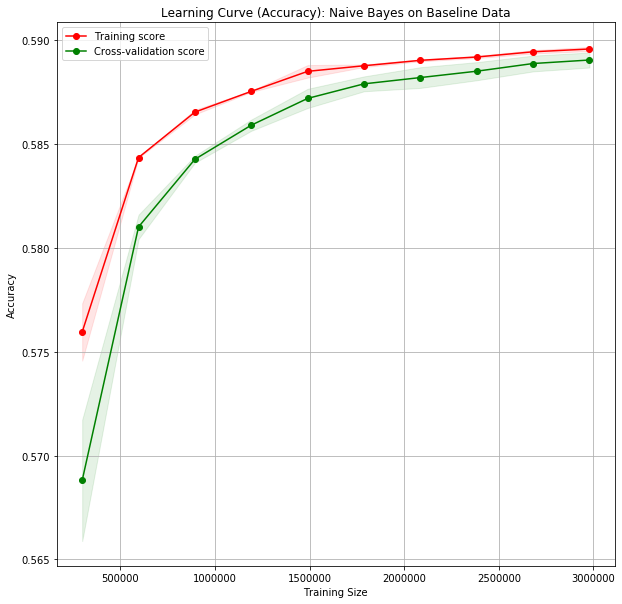

In [36]:
fig_lc, ax_lc = plt.subplots()
fig_lc.set_size_inches(10, 10)
ax_lc.grid()
ax_lc.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
ax_lc.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
ax_lc.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
ax_lc.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
ax_lc.legend(loc="best")
ax_lc.set_xlabel("Training Size")
ax_lc.set_ylabel("Accuracy")
ax_lc.set_title("Learning Curve (Accuracy): Naive Bayes on Baseline Data")

figname = os.path.join(output_dir, "nb_lc_baseline.pdf")
fig_lc.savefig(figname)

In [24]:
nb_lc_precision_job = pathutils.get_data_file("zz_qce_data/nb_basic/nb_learning_curve_precision_weighted_10_sparse.joblib")

In [26]:
lc_prec = joblib.load(nb_lc_precision_job)

In [28]:
train_sizes_pc = lc_prec['train_sizes_abs']
train_scores_pc = lc_prec['train_scores']
test_scores_pc = lc_prec['test_scores']
fit_times_pc = lc_prec['fit_times']
score_time_pc = lc_prec['score_times']

In [29]:
train_scores_pc_mean = np.mean(train_scores_pc, axis=1)
train_scores_pc_std = np.std(train_scores_pc, axis=1)
test_scores_pc_mean = np.mean(test_scores_pc, axis=1)
test_scores_pc_std = np.std(test_scores_pc, axis=1)

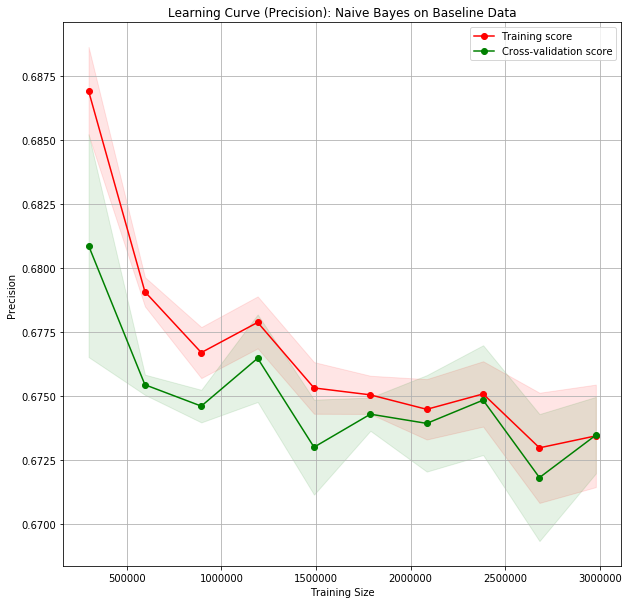

In [32]:
fig_lc_prec, ax_lc_prec = plt.subplots()
fig_lc_prec.set_size_inches(10, 10)
ax_lc_prec.grid()
ax_lc_prec.fill_between(train_sizes_pc, train_scores_pc_mean - train_scores_pc_std,
                     train_scores_pc_mean + train_scores_pc_std, alpha=0.1,
                     color="r")
ax_lc_prec.fill_between(train_sizes_pc, test_scores_pc_mean - test_scores_pc_std,
                     test_scores_pc_mean + test_scores_pc_std, alpha=0.1,
                     color="g")
ax_lc_prec.plot(train_sizes_pc, train_scores_pc_mean, 'o-', color="r",
             label="Training score")
ax_lc_prec.plot(train_sizes_pc, test_scores_pc_mean, 'o-', color="g",
             label="Cross-validation score")
ax_lc_prec.legend(loc="best")
ax_lc_prec.set_xlabel("Training Size")
ax_lc_prec.set_ylabel("Precision")
ax_lc_prec.set_title("Learning Curve (Precision): Naive Bayes on Baseline Data")

figname = os.path.join(output_dir, "nb_lc_prec_baseline.pdf")
fig_lc_prec.savefig(figname)

In [38]:
import json

In [39]:
# save scores to csv
nb_score_file = pathutils.get_data_file("zz_qce_data/nb_basic/nb_train_results_sparse.json")
with open(nb_score_file) as fp:
    nb_scores = json.load(fp)

In [40]:
score_map = {
    "top_2": "Top 2 Accuracy",
    "top_5": "Top 5 Accuracy",
    "accuracy": "Accuracy",
    "f1_unweighted": "F1 Unweighted",
    "f1_weighted": "F1 Weighted",
    "recall_unweighted": "Recall Unweighted",
    "recall_weighted": "Recall Weighted",
    "precision_unweighted": "Precision Unweighted",
    "precision_weighted": "Precision Weighted",
}

In [43]:
import io
csv_buffer = io.StringIO()

csv_buffer.write("Metric,Train,Validation\n")

for key, value in nb_scores.items():
    if key not in score_map:
        continue
    line = "%s,%.4f,%.4f\n" % (score_map.get(key), value.get("train"), value.get("test"))
    csv_buffer.write(line)

csv_file = os.path.join(output_dir, "nb_scores_summary.csv")

with open(csv_file, "w") as fp:
    fp.write(csv_buffer.getvalue())